In [1]:
from pathlib import Path
import pandas as pd

pd.set_option("mode.copy_on_write", True)
import seaborn.objects as so
from matplotlib import style
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns

sns.set(rc={"figure.dpi": 300, "savefig.dpi": 300})

repo_root = "../.."
# source files
scoped = repo_root + "/20_intermediate_file/overdose_analysis_scope_{}.parquet"

# output files
res_dir = Path(repo_root + "/30_results/overdose")

In [2]:
percap = "Deaths per 100k Population"
change_years = {"Texas": 2007, "Florida": 2010, "Washington": 2012}

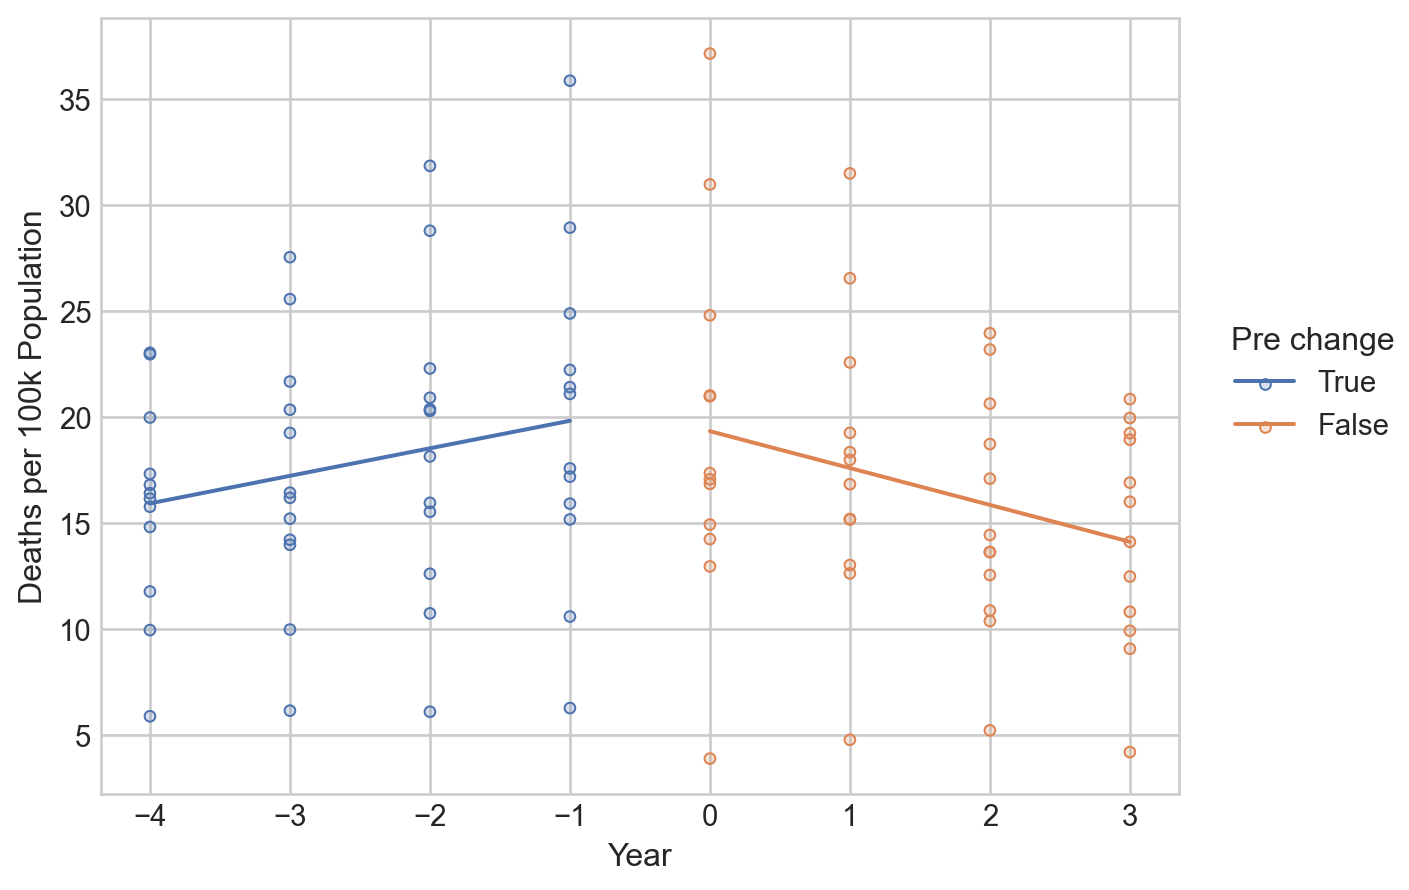

In [3]:
state = "Florida"
change_year = change_years[state]
state_df = pd.read_parquet(scoped.format(state))
state_df = state_df[state_df["STNAME"] == state]
state_df["Pre change"] = state_df["Year"] < change_year
state_df["Year"] -= change_year
state_df["Deaths per 100k Population"] = (
    state_df["Deaths"] * 100000 / state_df["Population"]
)

(
    so.Plot(state_df, x="Year", y="Deaths per 100k Population", color="Pre change")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(1))
    .label(title="")
    .theme({**style.library["seaborn-v0_8-whitegrid"]})
)

In [4]:
def pre_post(state):
    change_year = change_years[state]
    state_df = pd.read_parquet(scoped.format(state))
    state_df = state_df[state_df["STNAME"] == state]
    state_df["Pre change"] = state_df["Year"] < change_year
    state_df["Year"] -= change_year

    g = (
        sns.lmplot(
            state_df,
            x="Year",
            y=percap,
            hue="Pre change",
            ci=68,
            aspect=1.5,
            legend=False,
            scatter=False,
        )
        .refline(x=0)
        .set_axis_labels("Years from Policy Change")
        .set(title=f"{state} Overdose deaths Pre-Post Model Graph")
    )
    ax = g.ax
    ax.text(0, ax.get_ylim()[1] - 1, "Policy Change", ha="center")
    g.fig.tight_layout()
    g.fig.savefig(res_dir / f"{state}_Overdose_Pre-Post")

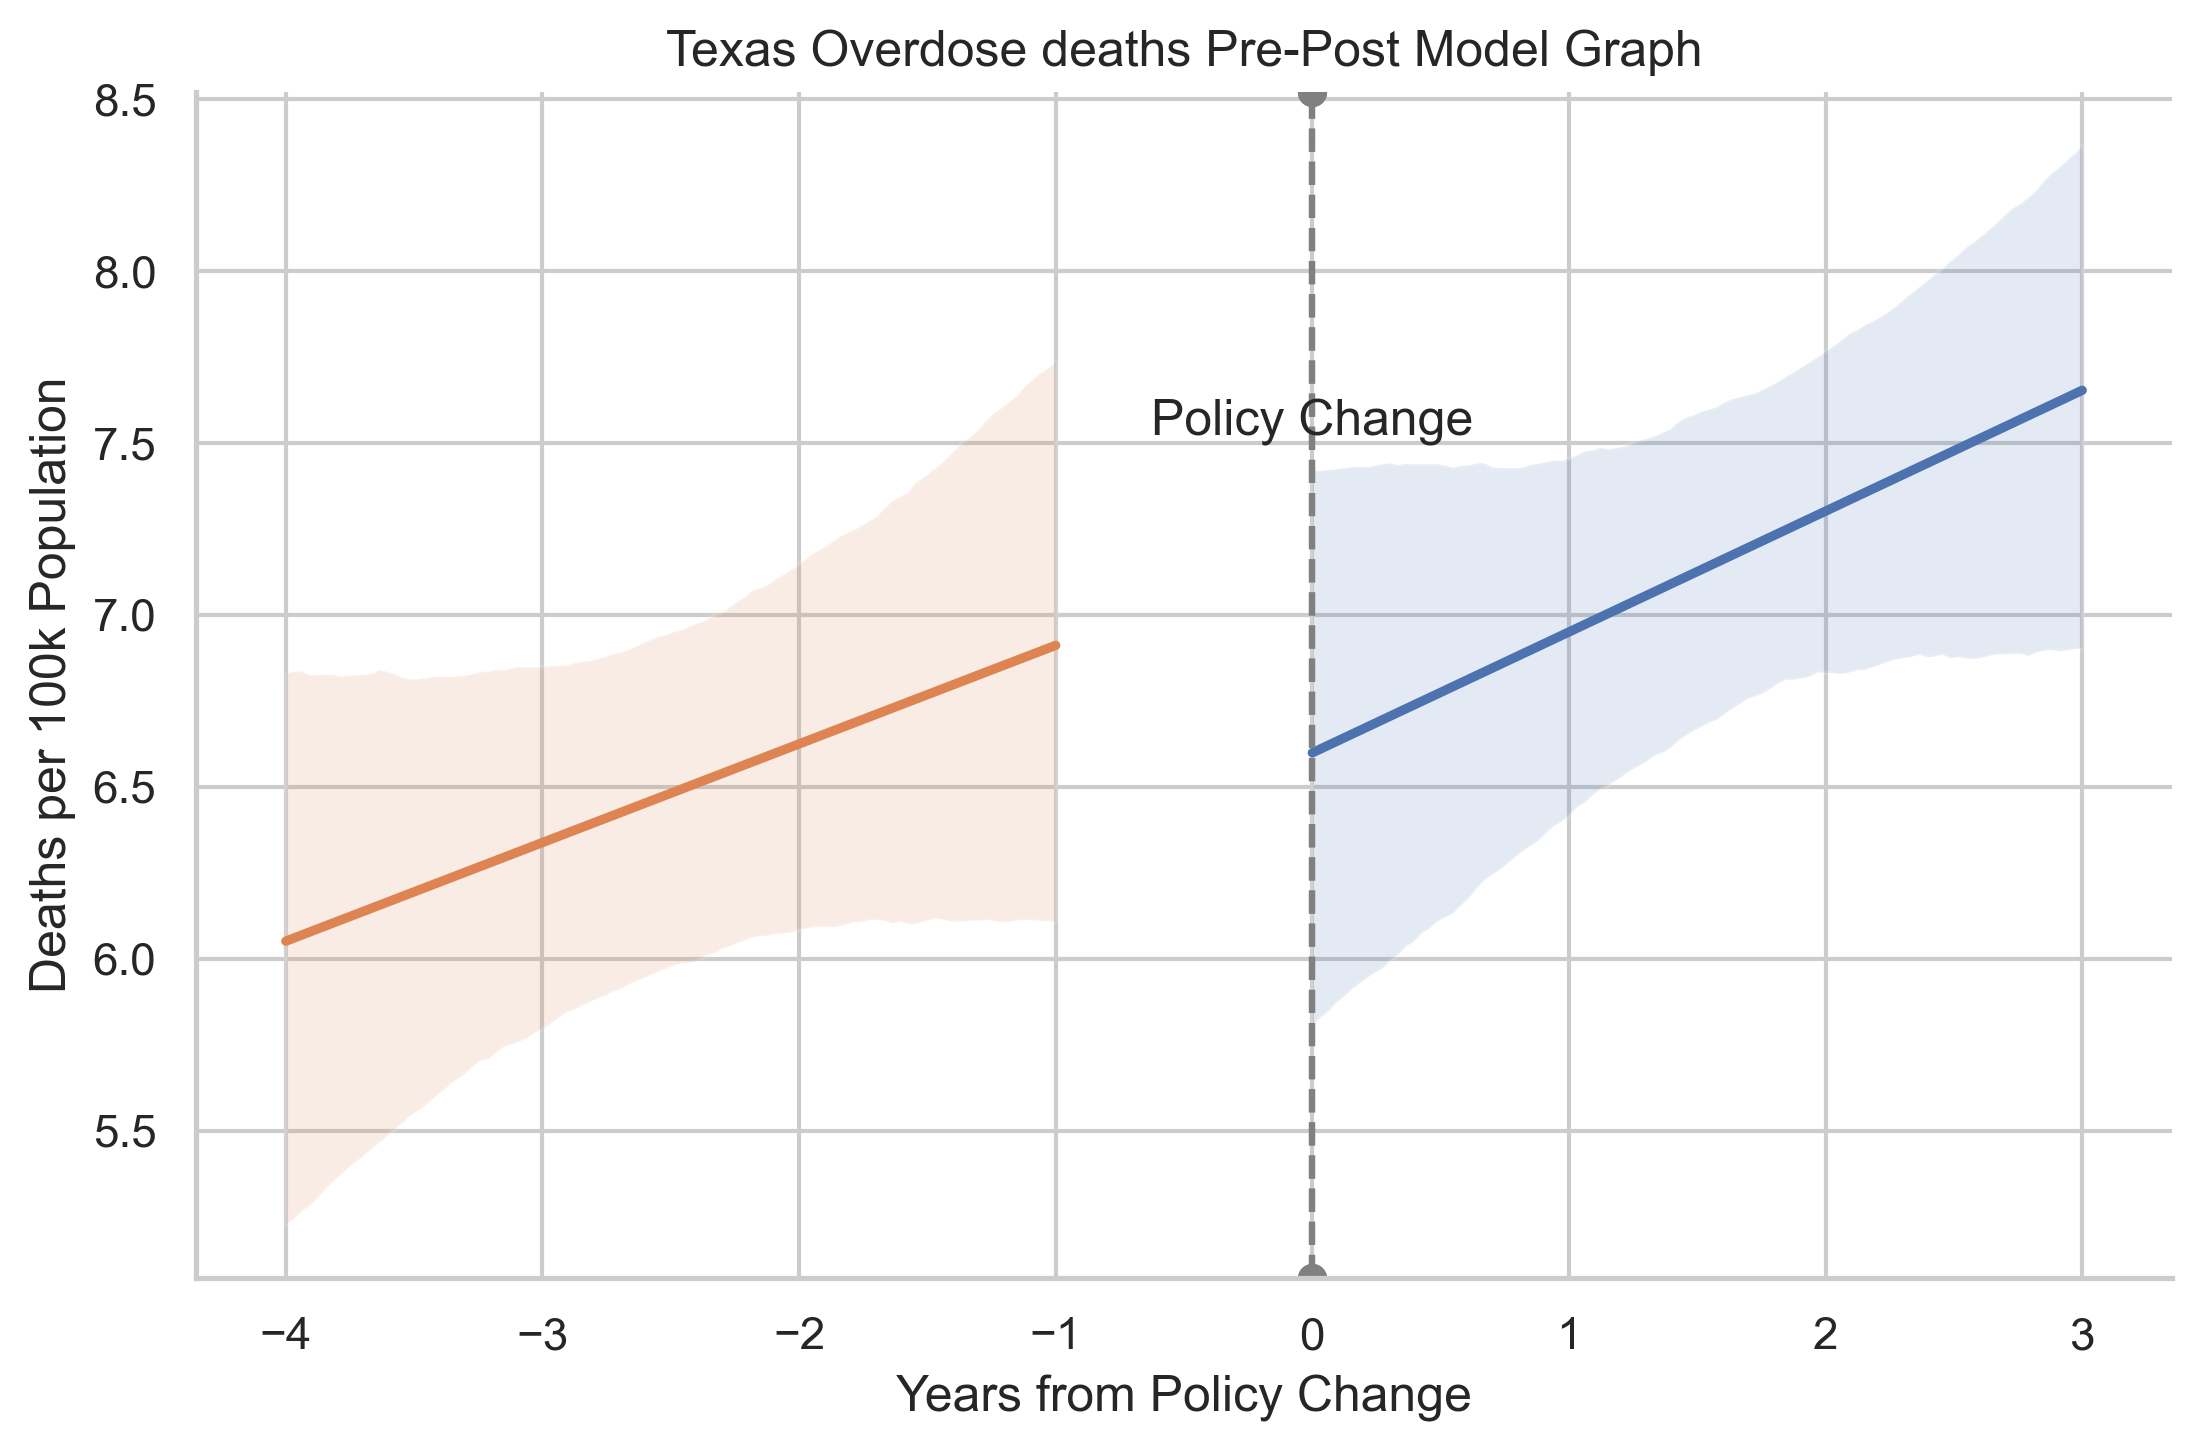

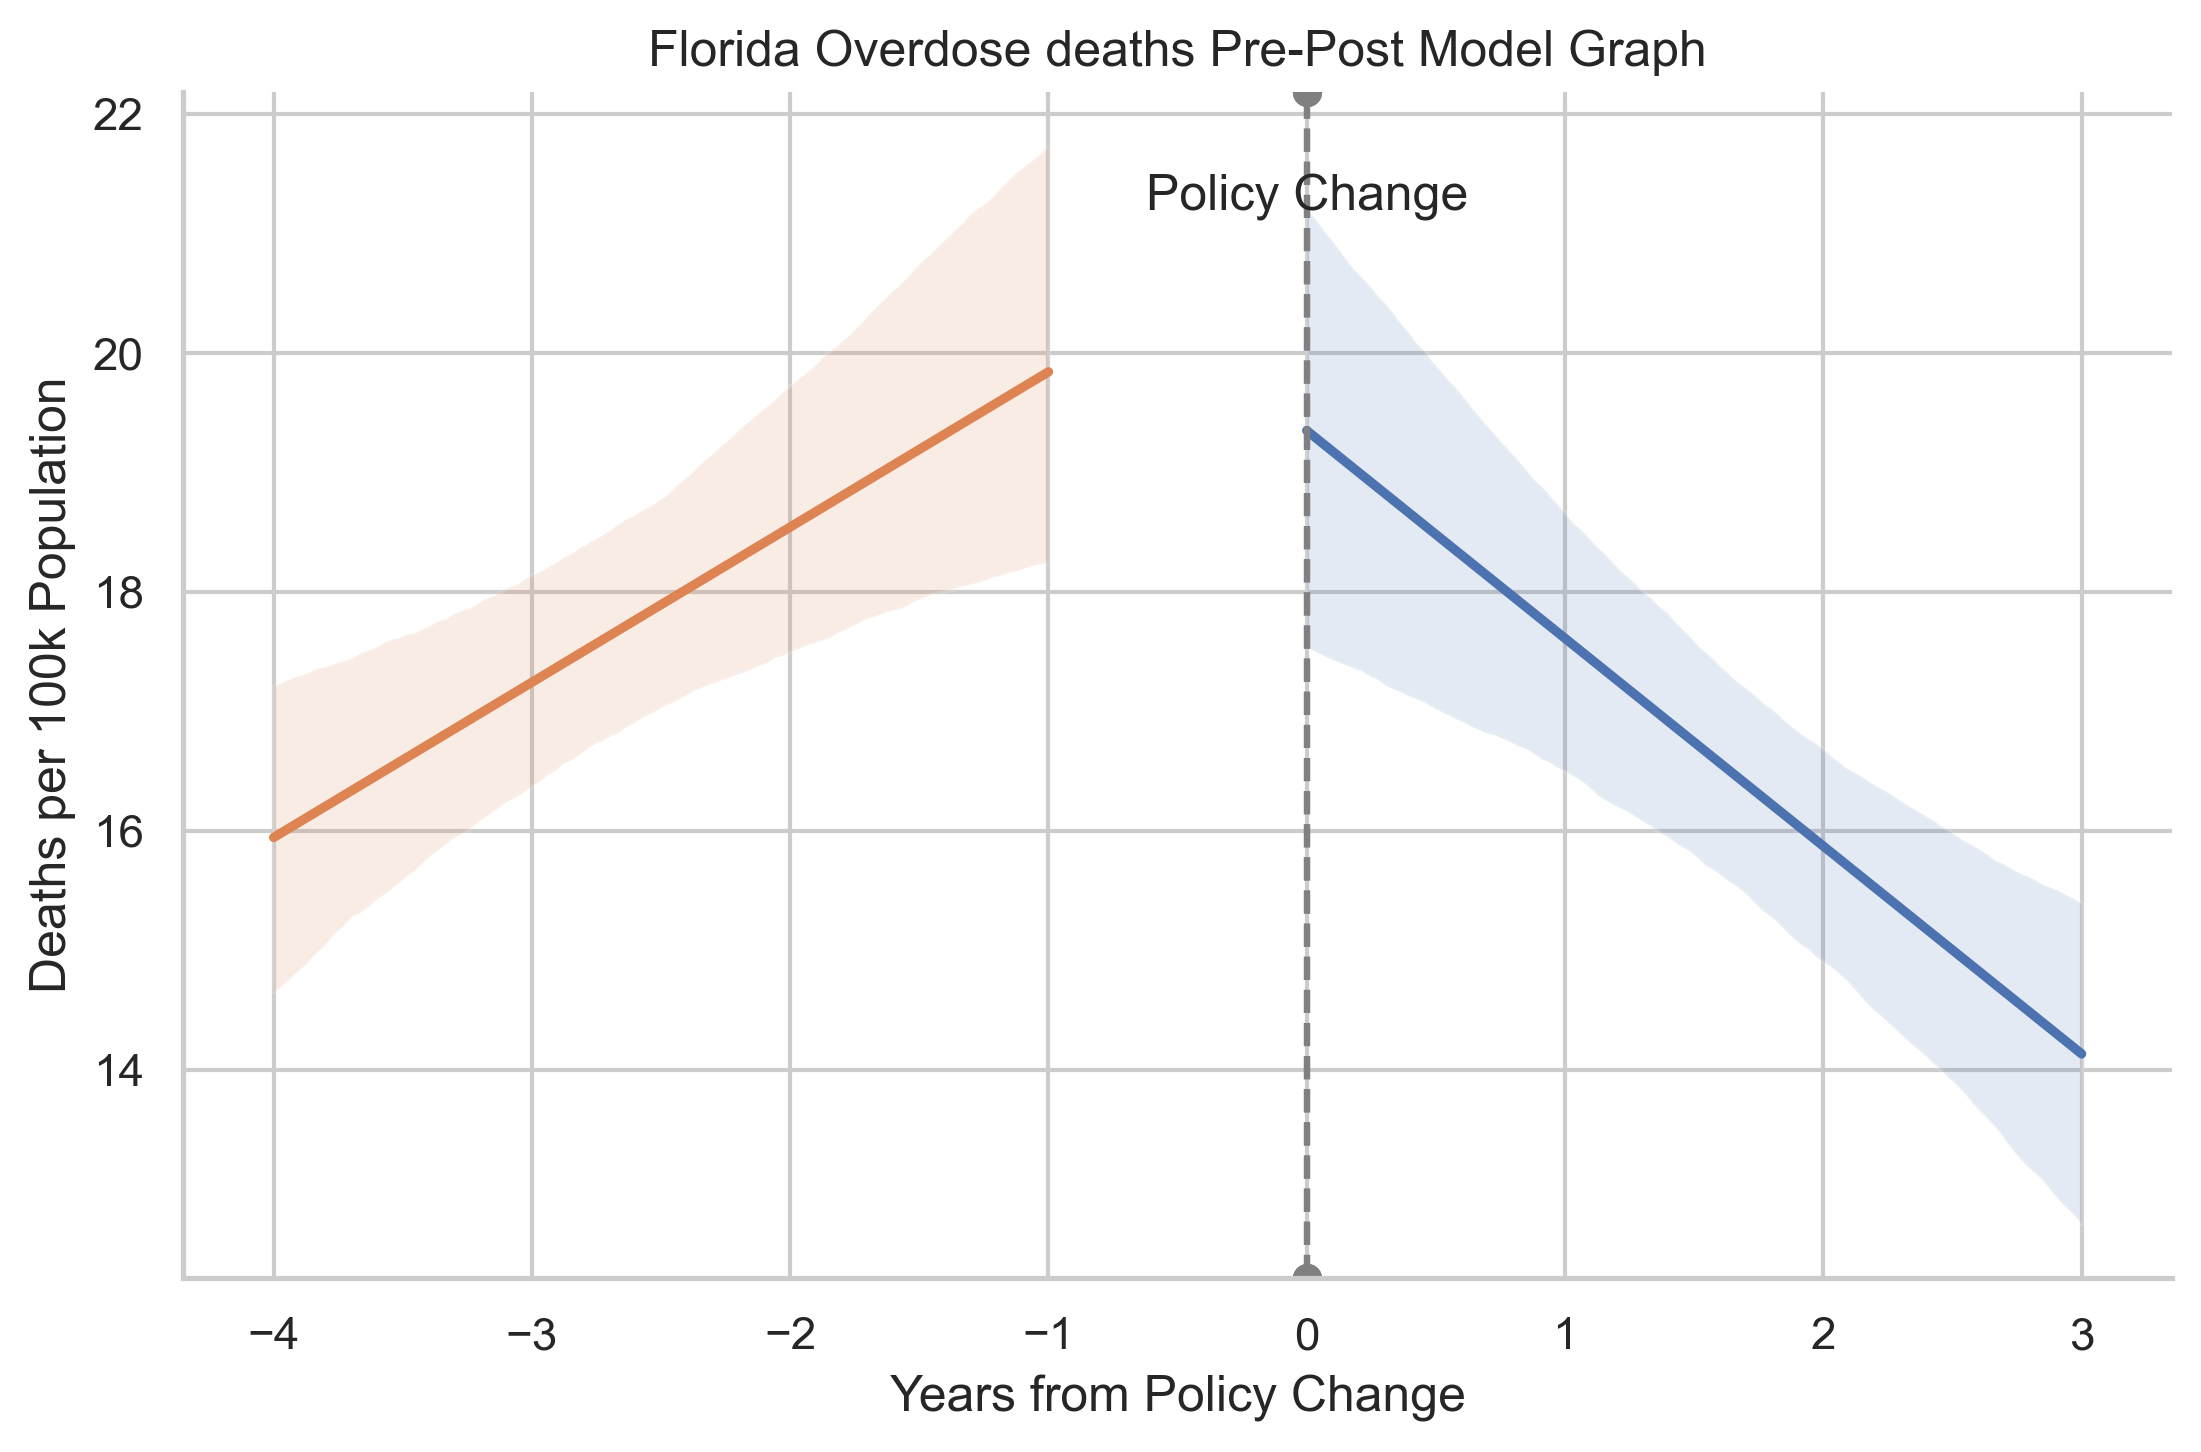

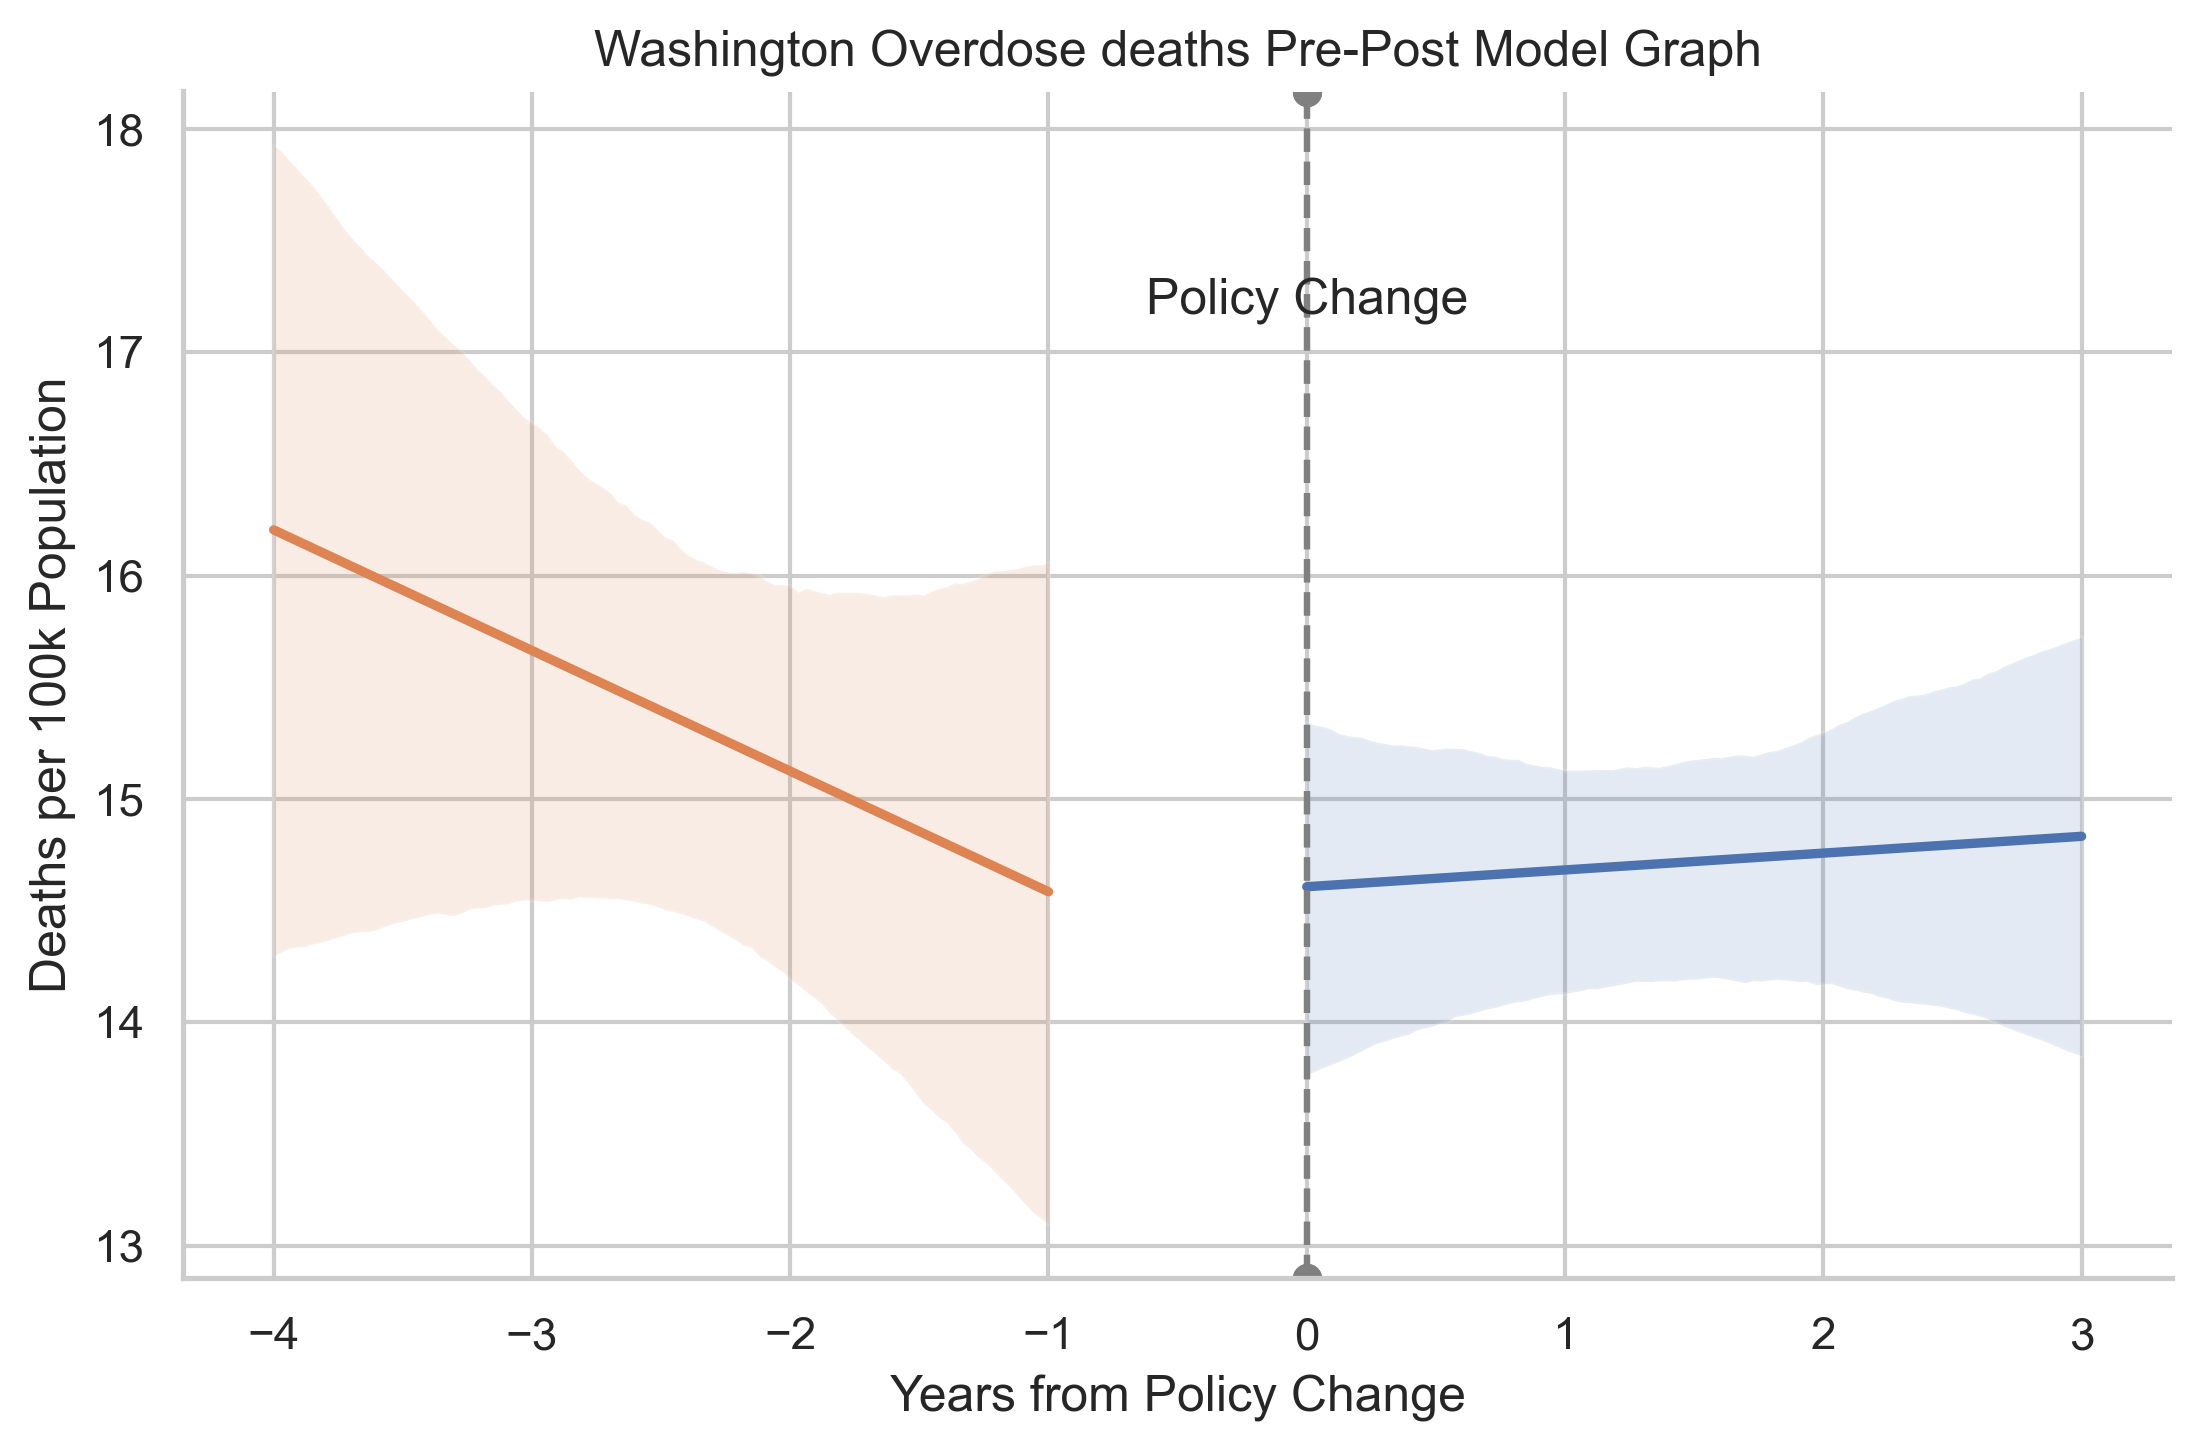

In [5]:
sns.set_style("whitegrid")
pre_post("Texas")
pre_post("Florida")
pre_post("Washington")